# ---------------- ÍNDICE-PREFERENCIA-PROJETO -------------------#
Porcentagem de preferência por projeto

P1: 2.18%
P2: 2.35%
P3: 2.18%
P4: 3.78%
P5: 2.44%
P6: 1.68%
P7: 3.45%
P8: 3.87%
P9: 2.77%
P10: 2.86%
P11: 1.18%
P12: 1.76%
P13: 1.09%
P14: 1.18%
P15: 1.09%
P16: 0.42%
P17: 1.01%
P18: 1.85%
P19: 3.87%
P20: 2.77%
P21: 2.35%
P22: 0.76%
P23: 0.76%
P24: 2.44%
P25: 0.67%
P26: 1.60%
P27: 4.20%
P28: 1.68%
P29: 2.02%
P30: 5.04%
P31: 1.60%
P32: 1.26%
P33: 1.01%
P34: 3.19%
P35: 0.92%
P36: 2.02%
P37: 3.19%
P38: 3.45%
P39: 1.85%
P40: 3.61%
P41: 1.51%
P42: 0.84%
P43: 2.44%
P44: 0.42%
P45: 1.01%
P46: 0.76%
P47: 1.85%
P48: 2.27%
P49: 0.92%
P50: 0.59%
# ---------------------- PROJECT-PROPOSING ----------------------#
Número de Alunos Inscritos: 59

Lista de Alunos Inscritos:
A1 inscrito em P1, A2 inscrito em P1, A31 inscrito em P2, A33 inscrito em P3, A60 inscrito em P3, A32 inscrito em P4, A35 inscrito em P5, A83 inscrito em P5, A8 inscrito em P6, A117 inscrito em P7, A187 inscrito em P7, A18 ins

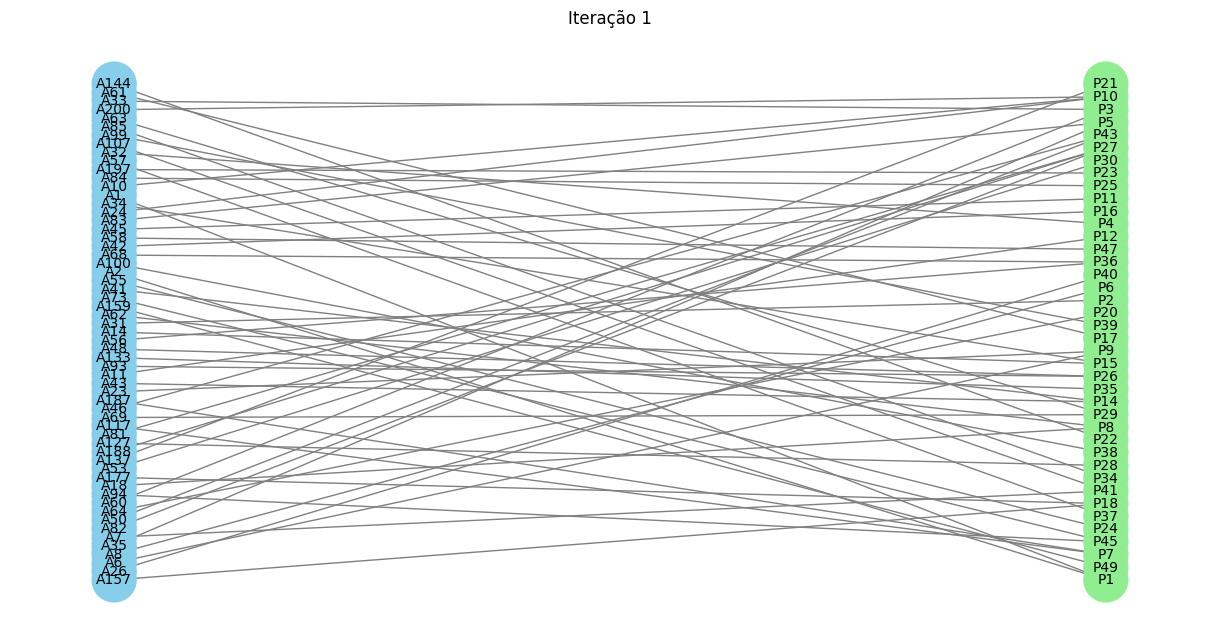

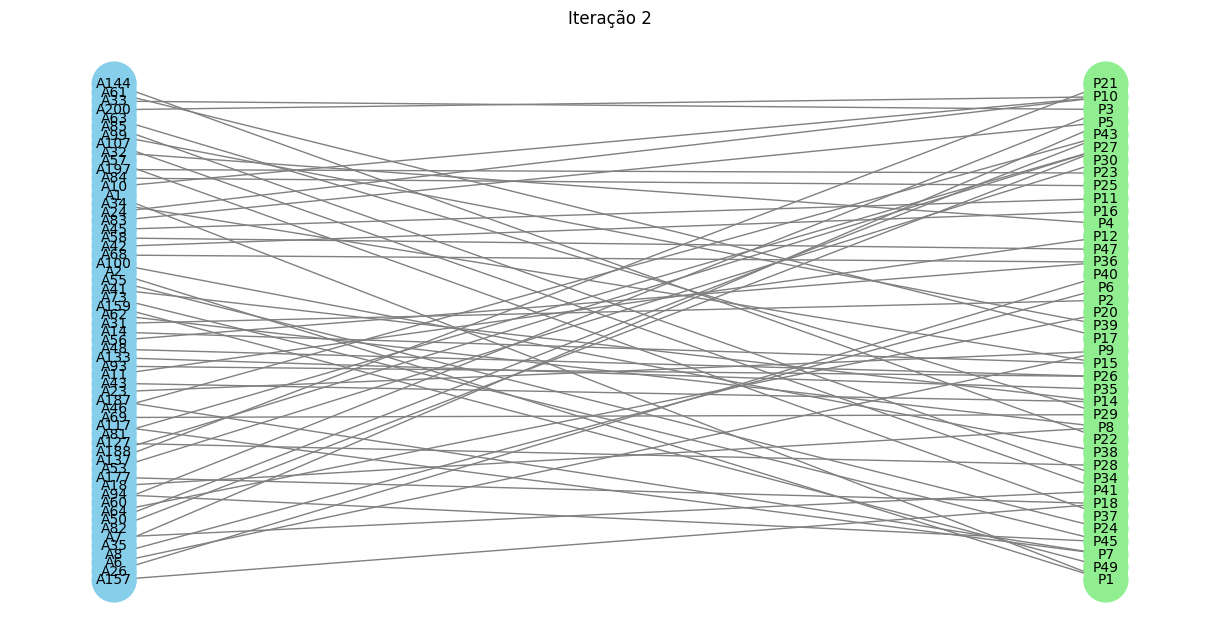


# ---------------------- STUDENT-PROPOSING ----------------------#
Número de Alunos Inscritos: 57

Lista de Alunos Inscritos:
A2 inscrito em P1, A1 inscrito em P1, A82 inscrito em P2, A60 inscrito em P3, A33 inscrito em P3, A34 inscrito em P4, A35 inscrito em P5, A85 inscrito em P5, A8 inscrito em P6, A117 inscrito em P7, A187 inscrito em P7, A18 inscrito em P8, A188 inscrito em P8, A23 inscrito em P9, A6 inscrito em P9, A24 inscrito em P10, A200 inscrito em P10, A50 inscrito em P10, A95 inscrito em P11, A31 inscrito em P12, A41 inscrito em P14, A43 inscrito em P14, A135 inscrito em P15, A154 inscrito em P15, A42 inscrito em P16, A61 inscrito em P17, A22 inscrito em P18, A98 inscrito em P18, A32 inscrito em P20, A177 inscrito em P21, A144 inscrito em P22, A141 inscrito em P24, A134 inscrito em P25, A143 inscrito em P26, A93 inscrito em P26, A81 inscrito em P27, A83 inscrito em P27, A127 inscrito em P28, A129 inscrito em P29, A69 inscrito em P29, A64 inscrito em P30, A174 inscrito em P

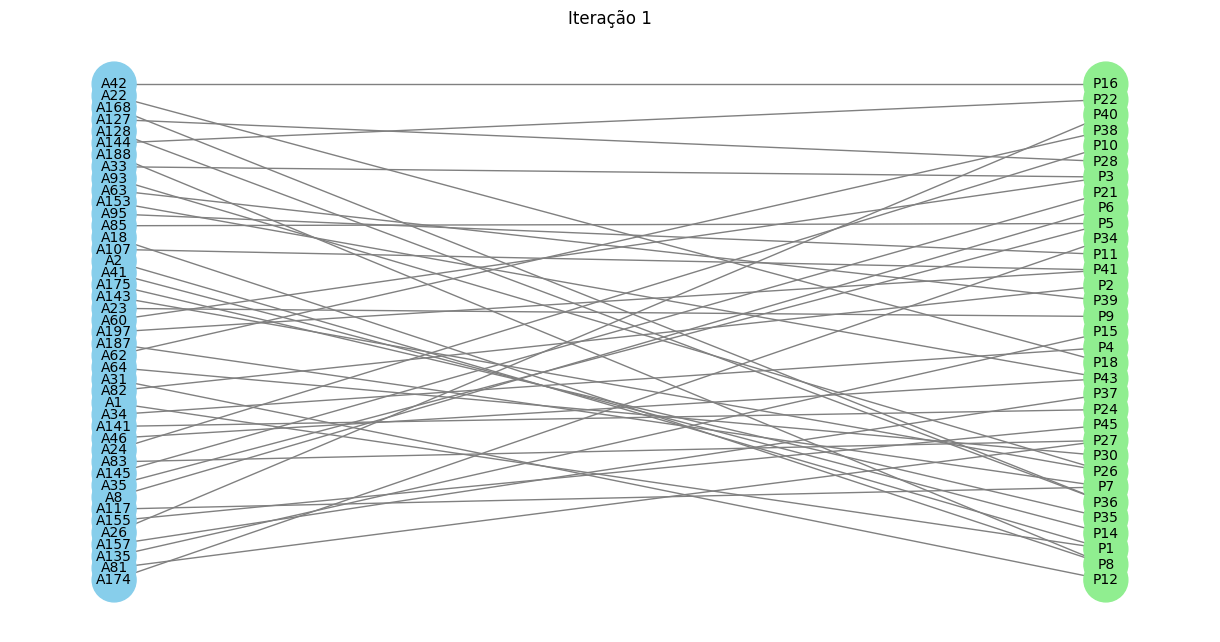

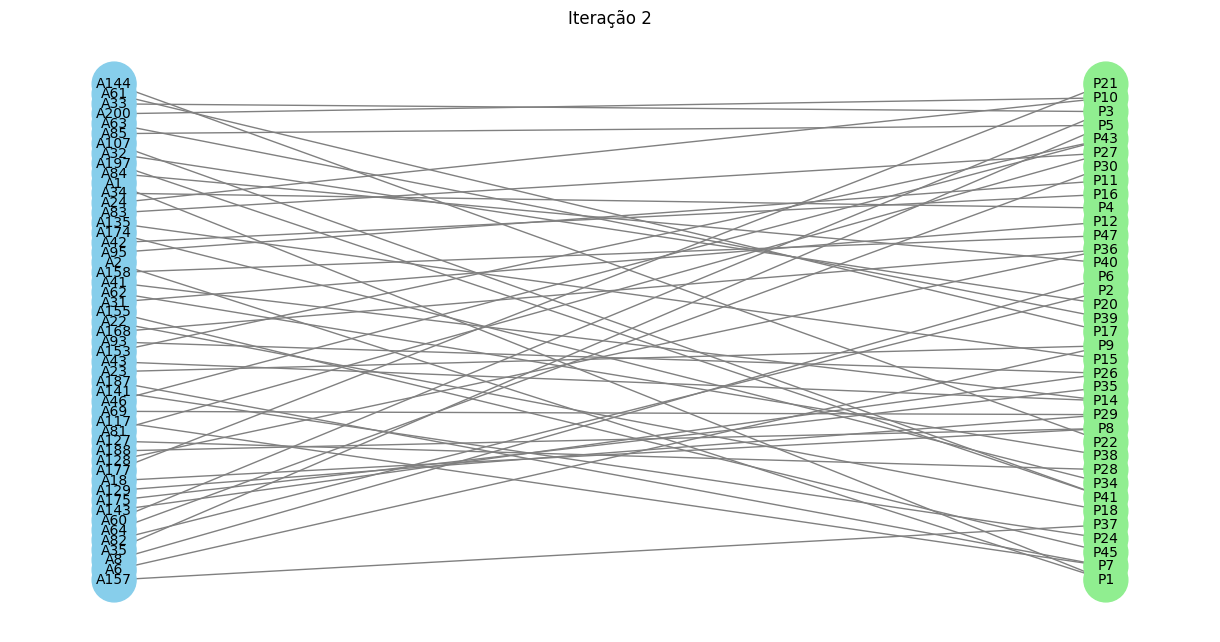

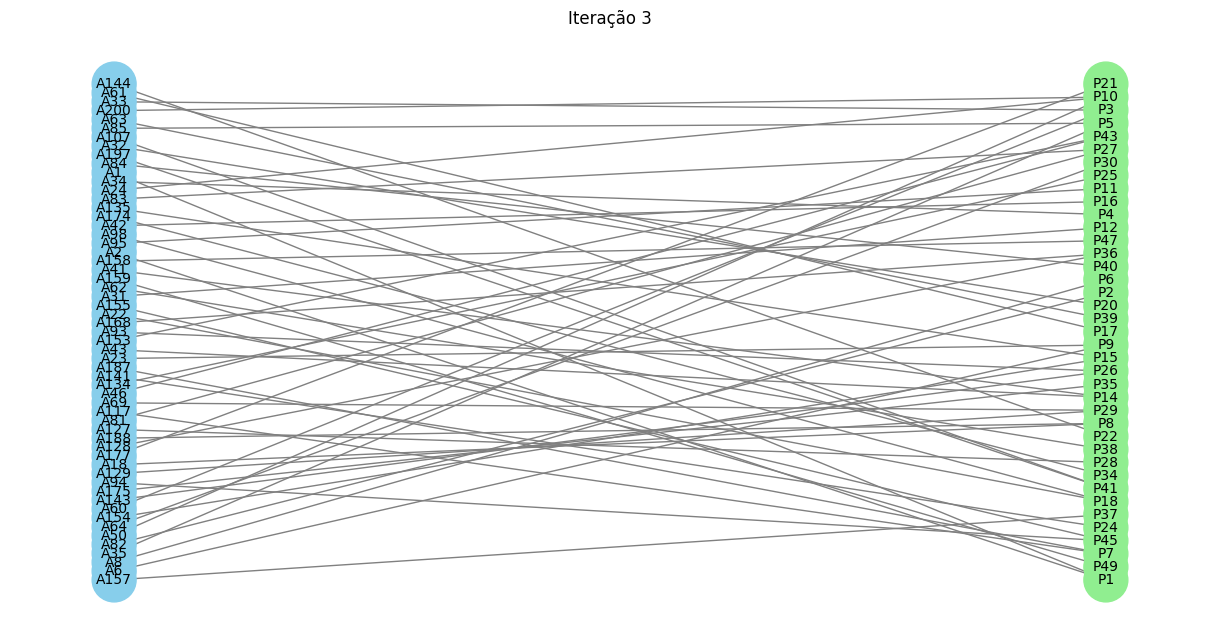

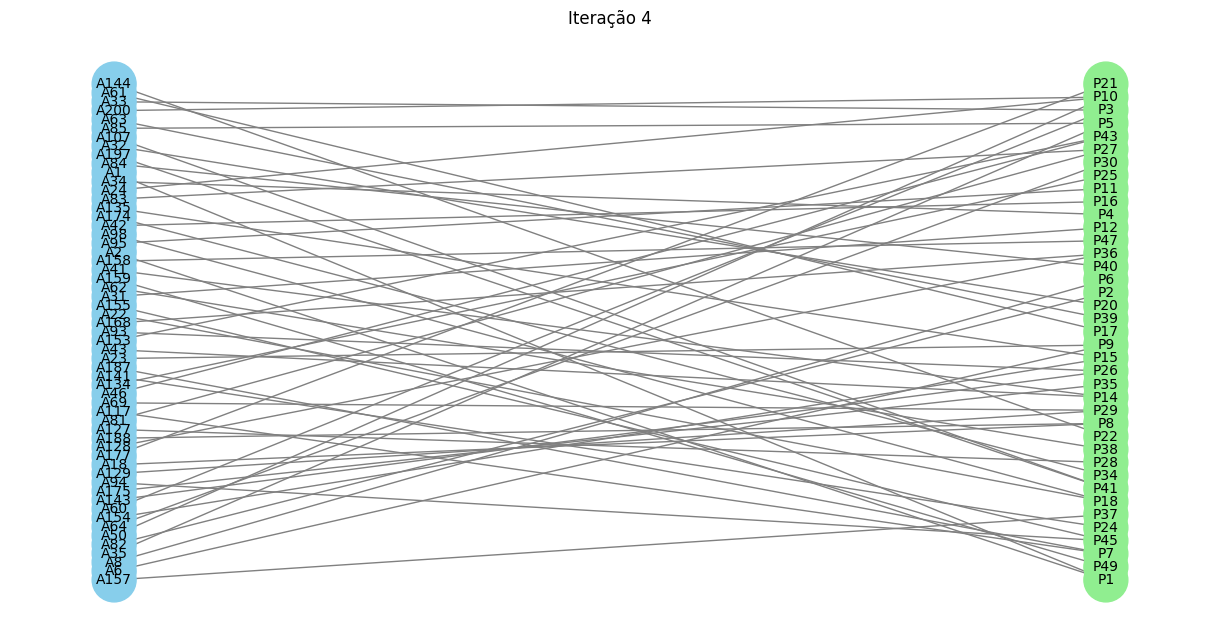

# ----------------------- MAX-CARDINALITY -----------------------#
Número de Alunos Inscritos: 63

Lista de Alunos Inscritos:
A2 inscrito em P1, A200 inscrito em P1, A32 inscrito em P2, A33 inscrito em P3, A60 inscrito em P3, A84 inscrito em P4, A16 inscrito em P5, A35 inscrito em P5, A8 inscrito em P6, A117 inscrito em P7, A187 inscrito em P7, A18 inscrito em P8, A188 inscrito em P8, A23 inscrito em P9, A69 inscrito em P9, A50 inscrito em P10, A110 inscrito em P10, A170 inscrito em P10, A124 inscrito em P11, A142 inscrito em P12, A41 inscrito em P14, A151 inscrito em P14, A26 inscrito em P15, A135 inscrito em P15, A42 inscrito em P16, A21 inscrito em P17, A17 inscrito em P18, A22 inscrito em P18, A91 inscrito em P20, A147 inscrito em P21, A144 inscrito em P22, A197 inscrito em P23, A95 inscrito em P24, A104 inscrito em P25, A93 inscrito em P26, A143 inscrito em P26, A62 inscrito em P27, A81 inscrito em P27, A83 inscrito em P27, A178 inscrito em P28, A129 inscrito em P29, A169 inscrito

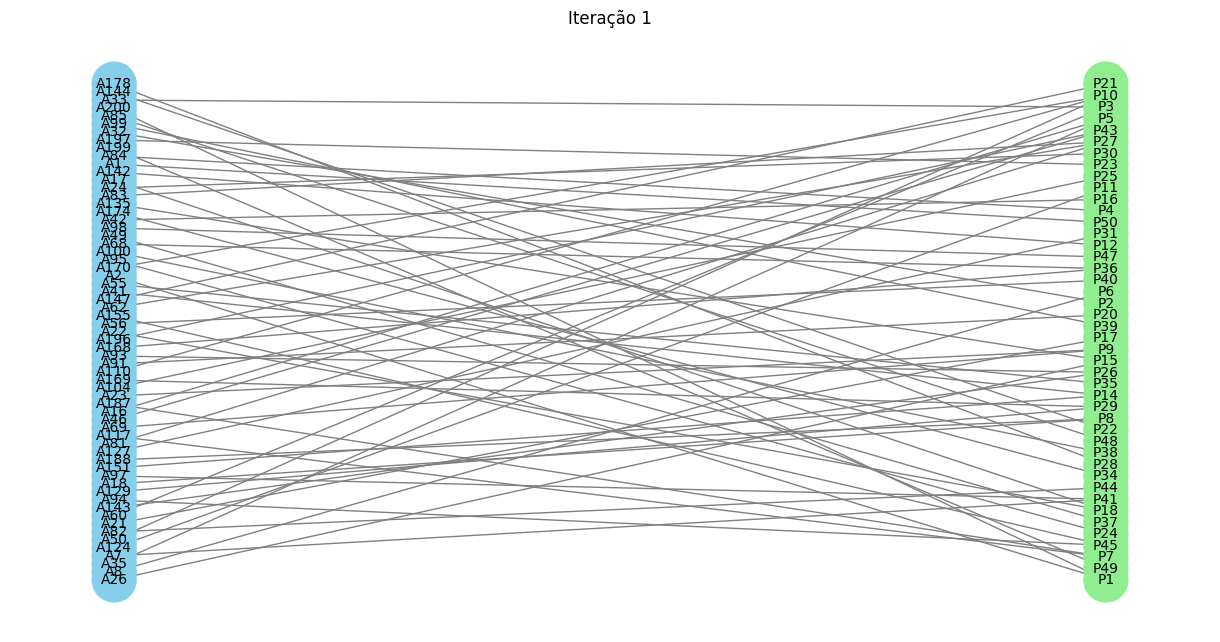

In [ ]:
import re

import matplotlib.pyplot as plt
import networkx as nx
from copy import deepcopy


def coletaDados(estado_final, alunos, projetos):
    alunos_inscritos = set()
    projetos_realizados = set()
    total_alocados = 0
    inscricoes = []

    for projeto, lista in estado_final.items():
        if lista:
            projetos_realizados.add(projeto)
            for nota, aluno in lista:
                alunos_inscritos.add(aluno)
                inscricoes.append((aluno, projeto))
                total_alocados += 1

    todos_alunos = set(alunos.keys())
    alunos_nao_inscritos = list(todos_alunos - alunos_inscritos)

    todos_projetos = set(projetos.keys())
    projetos_vazios = list(todos_projetos - projetos_realizados)

    media_alunos = total_alocados / len(projetos_realizados) if projetos_realizados else 0

    tamanho_emparelhamento = sum(len(v) for v in estado_final.values())

    return {
        "num_alunos_inscritos": len(alunos_inscritos),
        "lista_alunos_inscritos": inscricoes,
        "num_alunos_nao_inscritos": len(alunos_nao_inscritos),
        "lista_alunos_nao_inscritos": alunos_nao_inscritos,
        "num_projetos_vazios": len(projetos_vazios),
        "lista_projetos_vazios": projetos_vazios,
        "num_projetos_realizados": len(projetos_realizados),
        "lista_projetos_realizados": list(projetos_realizados),
        "media_alunos_por_projeto": media_alunos,
        "tamanho_emparelhamento": tamanho_emparelhamento
}

def desenhar_grafo(historico, alunos, projetos, showNonConnected=True):
    for i, estado in enumerate(historico):
        G = nx.Graph()

        # Criar arestas a partir do estado atual (iterações do algoritmo)
        edges = [(a, p) for p, lista in estado.items() for (_, a) in lista]

        # Adicionar nós conforme configuração
        if showNonConnected:
            G.add_nodes_from(alunos.keys(), bipartite=0)
            G.add_nodes_from(projetos.keys(), bipartite=1)
        else:
            conectados = set()
            for a, p in edges:
                conectados.add(a)
                conectados.add(p)
            G.add_nodes_from(conectados)

        # Adicionar arestas
        G.add_edges_from(edges)

        # Layout bipartido
        left_nodes = [n for n in G.nodes if n in alunos]
        pos = nx.bipartite_layout(G, left_nodes)
        # Aumenta o espaçamento horizontal e vertical
        pos = {n: (x , y * 100) for n, (x, y) in pos.items()}


        # Cores por tipo de nó
        cores = ['skyblue' if n in alunos else 'lightgreen' for n in G.nodes]

        # Desenhar o grafo
        plt.figure(figsize=(12, 6))
        nx.draw(
            G, pos,
            with_labels=True,
            node_color=cores,
            edge_color='gray',
            node_size=1000, #Alterar caso vizualisação incerta
            font_size=10
        )
        plt.title(f"Iteração {i + 1}")
        plt.show()

def ler_dados_alunos(caminho_arquivo):
    alunos = {}
    with open(caminho_arquivo, 'r') as f:
        for linha in f:
            linha = linha.strip()
            match = match = re.match(r"\((A\d+)\):\((P\d+)(?:,\s*(P\d+))?(?:,\s*(P\d+))?\)\s*\((\d)\)", linha)
            if match:
                aluno_id = match.group(1)
                preferencias = [p for p in match.group(2, 3, 4) if p]
                nota = int(match.group(5))
                alunos[aluno_id] = {
                    "preferencias": preferencias,
                    "nota": nota
                }
            else:
                print(f"Linha ignorada (formato inválido): {linha}")
    return alunos

# Funcão que realiza a leitura do arquivo dadosProjetos.txt
def ler_dados_projetos(caminho_arquivo):
    projetos = {}
    with open(caminho_arquivo, 'r') as f:
        for linha in f:
            linha = linha.strip()
            match = re.match(r"\((P\d+),\s*(\d+),\s*(\d+)\)", linha)
            if match:
                projeto_id = match.group(1)
                vagas = int(match.group(2))
                nota_min = int(match.group(3))
                projetos[projeto_id] = {
                    "vagas": vagas,
                    "nota_min": nota_min,
                    "candidatos": []  # será usado posteriormente
                }
            else:
                print(f"Linha ignorada (formato inválido): {linha}")
    return projetos

def realizarColeta(dados):
    for k, v in dados.items():
        match k:
            case "num_alunos_inscritos": print(f'Número de Alunos Inscritos: {v}')
            case "lista_alunos_inscritos": 
                print('Lista de Alunos Inscritos:')
                for par in v:
                    if par == v[-1]:
                        print(f'{par[0]} inscrito em {par[1]}.')
                        break
                    print(f'{par[0]} inscrito em {par[1]}', end= ', ')
            case "num_alunos_nao_inscritos": print(f'Número de Alunos não Inscritos: {v}')
            case "lista_alunos_nao_inscritos":
                print('Lista de Alunos não Inscritos:')
                for aluno in v:
                    if aluno == v[-1]:
                        print(f'{aluno}.')
                        break
                    print(f'{aluno}', end= ', ')
            case "num_projetos_vazios": print(f'Número de Projetos Vazios: {v}')
            case "lista_projetos_vazios": 
                print('Lista de Projetos não Realizados (Sem Alunos):')
                for projeto in v:
                    if projeto == v[-1]:
                        print(f'{projeto}.')
                        break
                    print(f'{projeto}', end= ', ')
            case "num_projetos_realizados": print(f'Número de Projetos Realizados: {v}')
            case "lista_projetos_realizados": 
                print('Lista de Projetos Realizados:')
                for projeto in v:
                    if projeto == v[-1]:
                        print(f'{projeto}.')
                        break
                    print(f'{projeto}', end= ', ')
            case "media_alunos_por_projeto": print(f'Média de Alunos por Projeto: {v}')
            case "tamanho_emparelhamento": print(f'Tamanho do Emparelhamento (Arestas): {v}')
        print()

def desenharGrafo(historico, alunos, projetos, showNonConnected=False):
    desenhar_grafo(historico, alunos, projetos, showNonConnected)




def retornaIndice(alunos, projetos):
    # Inicializa o dicionário com todos os projetos de P1 a P50 com valor 0
    indice = {f'P{i}': 0 for i in range(1, 51)}
    totalPontos = 0

    for aluno_id, info in alunos.items():
        preferencias = info["preferencias"]

        for i, projeto_id in enumerate(preferencias):  # Não há mais slicing
            if projeto_id in projetos:
                pontos = 3 - i  # 3 para o 1º, 2 para o 2º, 1 para o 3º
                indice[projeto_id] += pontos
                totalPontos += pontos

    # Gera dicionário final com porcentagens
    if totalPontos == 0:
        print("Nenhum ponto foi computado.")
        return

    porcentagens = {
        k: (v / totalPontos) * 100 for k, v in indice.items()
    }
    '''
    # Printa o resultado
    for k, v in porcentagens.items():
        print(f"{k}: {v:.2f}%")
    '''
    return porcentagens





# ---------------------- GALE-SHAPLEY: PROJECT-PROPOSING ----------------------
def gale_shapley_projetos_propoem(alunos, projetos, max_iter=10):
    historico = []

    # Construir lista de candidatos qualificados para cada projeto
    for aluno, info in alunos.items():
        for proj in info['preferencias']:
            if proj in projetos and info['nota'] >= projetos[proj]['nota_min']:
                projetos[proj]['candidatos'].append((aluno, info['nota']))

    # Ordenar candidatos por nota (maior primeiro)
    for p in projetos:
        projetos[p]['candidatos'].sort(key=lambda x: -x[1])

    # Dicionário projeto -> lista de (nota, aluno)
    emparelhamento = {p: [] for p in projetos}
    alocados = {}

    for it in range(max_iter):
        mudou = False
        for p, info in projetos.items():
            candidatos = info['candidatos']
            vagas = info['vagas']

            # Pega apenas os que ainda não estão alocados
            livres = [(a, n) for (a, n) in candidatos if a not in alocados]
            novos = livres[:vagas - len(emparelhamento[p])]

            if novos:
                mudou = True
                for a, n in novos:
                    emparelhamento[p].append((n, a))
                    alocados[a] = p

        historico.append({k: v.copy() for k, v in emparelhamento.items()})
        if not mudou:
            break

    return historico

# ---------------------- GALE-SHAPLEY: STUDENT-PROPOSING ----------------------
def gale_shapley_visual(alunos, projetos, max_iter=10):
    alunos_livres = {a for a in alunos}
    inscricoes = {a: [] for a in alunos}
    projeto_alocados = {p: [] for p in projetos}
    iteracao = 0
    historico = []

    while iteracao < max_iter:
        houve_alocacao = False
        for a in list(alunos_livres):
            aluno = alunos[a]
            prefs = aluno['preferencias']
            nota = aluno['nota']
            inscricoes_feitas = inscricoes[a]

            # Verificar se há algum projeto ainda não tentado
            projetos_a_tentar = [p for p in prefs if p not in inscricoes_feitas]
            if not projetos_a_tentar:
                continue  # nada mais a tentar

            p = projetos_a_tentar[0]
            inscricoes[a].append(p)
            projeto = projetos[p]
            min_nota = projeto['nota_min']
            vagas = projeto['vagas']
            alocados = projeto_alocados[p]

            if nota < min_nota:
                continue  # não qualifica

            if len(alocados) < vagas:
                alocados.append((nota, a))
                alunos_livres.remove(a)
                houve_alocacao = True

            else:
                # Já cheio, ver se substitui alguém
                pior_aluno = min(alocados, key=lambda x: x[0])  # menor nota
                if nota > pior_aluno[0]:
                    alocados.remove(pior_aluno)
                    alocados.append((nota, a))
                    alunos_livres.remove(a)
                    alunos_livres.add(pior_aluno[1])
                    houve_alocacao = True

        # Salvar estado do grafo atual para visualização
        historico.append(deepcopy(projeto_alocados))
        if not houve_alocacao:
            break  # não houve mudanças, estável
        iteracao += 1

    return historico


# ---------------------- GALE-SHAPLEY: MAX-CARDINALITY ----------------------

from pulp import LpProblem, LpVariable, lpSum, LpMaximize, LpBinary, PULP_CBC_CMD
def max_cardinality_stable_matching(alunos, projetos):
    prob = LpProblem("MCSM", LpMaximize)
    # Variáveis binárias: x[a,p] == 1 se aluno a for alocado ao projeto p
    x = {
        (a, p): LpVariable(f"x_{a}_{p}", cat=LpBinary)
        for a, info in alunos.items()
        for p in info['preferencias']
        if p in projetos and info['nota'] >= projetos[p]['nota_min']
    }

    # 1. Cada aluno pode ter no máximo um projeto
    for a in alunos:
        prob += lpSum(x.get((a, p), 0) for p in alunos[a]['preferencias']) <= 1

    # 2. Cada projeto tem limite de vagas
    for p in projetos:
        prob += lpSum(x.get((a, p), 0) for a in alunos) <= projetos[p]['vagas']

    # 3. Impedir pares bloqueadores
    for a, info in alunos.items():
        prefs = info['preferencias']
        nota = info['nota']
        for p in prefs:
            if p not in projetos or nota < projetos[p]['nota_min']:
                continue

            # Estudante preferiria p a qualquer projeto alocado?
            worse_projects = prefs[prefs.index(p)+1:]

            # Constrói a condição de bloqueio:
            # se aluno não está alocado, ou está com projeto pior,
            # e projeto p tem vaga, então o par (a,p) é bloqueador — proibido.
            lhs = x.get((a, p), 0)
            rhs_aluno = lpSum(x.get((a, wp), 0) for wp in worse_projects)
            rhs_proj = lpSum(x.get((a2, p), 0) for a2 in alunos)

            prob += lhs + rhs_aluno + 1 <= projetos[p]['vagas'] + rhs_proj

    # 4. Função objetivo: maximizar o número de alocações
    prob += lpSum(x.values())

    # Resolver
    solver = PULP_CBC_CMD(msg=False)
    prob.solve(solver)

    # Interpretar solução
    emparelhamento = {}
    for (a, p), var in x.items():
        if var.varValue == 1:
            emparelhamento[a] = p

    return emparelhamento

def inverter_emparelhamento(emparelhamento_aluno_projeto, alunos):
    # Inicializa o dicionário com todos os projetos de P1 a P50
    emparelhamento_projeto_aluno = {f'P{i}': [] for i in range(1, 51)}

    # Preenche com (nota, aluno) a partir do emparelhamento original
    for aluno_id, projeto_id in emparelhamento_aluno_projeto.items():
        if projeto_id in emparelhamento_projeto_aluno:
            nota = alunos[aluno_id]['nota']
            emparelhamento_projeto_aluno[projeto_id].append((nota, aluno_id))
        else:
            # Para projetos fora de P1 a P50 (opcional: pode ignorar ou incluir)
            nota = alunos[aluno_id]['nota']
            emparelhamento_projeto_aluno.setdefault(projeto_id, []).append((nota, aluno_id))

    return emparelhamento_projeto_aluno




# ---------------------- MAIN ----------------------
def main():
    alunos = ler_dados_alunos("dadosAlunos.txt")
    projetos = ler_dados_projetos("dadosProjetos.txt")

    indice = retornaIndice(alunos,projetos)
    
    historicoPP = gale_shapley_projetos_propoem(alunos, projetos, max_iter=10)
    dadosPP = coletaDados(historicoPP[-1], alunos, projetos)
    
    emparelhamentoMC = max_cardinality_stable_matching(alunos, projetos)
    emparelhamentoMC = inverter_emparelhamento(emparelhamentoMC, alunos)

    historicoMC = []
    historicoMC.append(emparelhamentoMC)

    dadosMC = coletaDados(historicoMC[-1], alunos, projetos)


    print('# ---------------- ÍNDICE-PREFERENCIA-PROJETO -------------------#')

    print('Porcentagem de preferência por projeto')
    print()
    for k, v in indice.items():
        print(f"{k}: {v:.2f}%")
    print()

    print('# ---------------------- PROJECT-PROPOSING ----------------------#')

    realizarColeta(dadosPP)
    desenharGrafo(historicoPP, alunos, projetos, showNonConnected=False)
    
    print()
    
    #Limpa preferências inexistentes de alunos (P51+)
    for aluno_id, dados in alunos.items():
        dados['preferencias'] = [p for p in dados['preferencias'] if p in projetos]

    historicoAP = gale_shapley_visual(alunos, projetos, max_iter=10)
    dadosAP = coletaDados(historicoAP[-1], alunos, projetos)
    
    print('# ---------------------- STUDENT-PROPOSING ----------------------#')

    realizarColeta(dadosAP)
    desenharGrafo(historicoAP, alunos, projetos, showNonConnected=False)

    
    print('# ----------------------- MAX-CARDINALITY -----------------------#')
    
    realizarColeta(dadosMC)
    desenharGrafo(historicoMC, alunos, projetos, showNonConnected=False)
    

main()

